Importing the Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sp500_headlines_2008_2024.csv')
df.head()

,Title,Date,CP
0,"JPMorgan Predicts 2008 Will Be ""Nothing But Net""",2008-01-02,1447.16
1,Dow Tallies Biggest First-session-of-year Poin...,2008-01-02,1447.16
2,2008 predictions for the S&P 500,2008-01-02,1447.16
3,"U.S. Stocks Higher After Economic Data, Monsan...",2008-01-03,1447.16
4,U.S. Stocks Climb As Hopes Increase For More F...,2008-01-07,1416.18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19127 entries, 0 to 19126
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   19127 non-null  object 
 1   Date    19127 non-null  object 
 2   CP      19127 non-null  float64
dtypes: float64(1), object(2)
memory usage: 448.4+ KB


In [ ]:
df.isnull().sum()

,0
Title,0
Date,0
CP,0


1. Cleaning and Normalization

In [ ]:
import re
import string

# Define a function to clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text) # Remove text in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove URLs
    text = re.sub('<.*?>+', '', text) # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    text = re.sub('\n', '', text) # Remove newlines
    text = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
    return text

# Apply the cleaning function to the 'title' column
df['cleaned_title'] = df['Title'].apply(clean_text)

print(df[['Title', 'cleaned_title']].head())

<>:12: SyntaxWarning: invalid escape sequence '\w'
<>:12: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-3658171391.py:12: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text) # Remove words containing numbers


                                               Title  \
0   JPMorgan Predicts 2008 Will Be "Nothing But Net"   
1  Dow Tallies Biggest First-session-of-year Poin...   
2                   2008 predictions for the S&P 500   
3  U.S. Stocks Higher After Economic Data, Monsan...   
4  U.S. Stocks Climb As Hopes Increase For More F...   

                                       cleaned_title  
0         jpmorgan predicts  will be nothing but net  
1  dow tallies biggest firstsessionofyear point d...  
2                            predictions for the sp   
3  us stocks higher after economic data monsanto ...  
4  us stocks climb as hopes increase for more fed...  


2. Tokenization and Stop Word Removal

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download punkt_tab resource

# Define a function to tokenize and remove stop words
stop_words = set(stopwords.words('english'))
# Add custom stop words relevant to financial news
custom_stopwords = {'market', 'report', 'stock', 'share', 'analyst', 'company', 'news'}
all_stopwords = stop_words.union(custom_stopwords)

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in all_stopwords]

# Apply the function to the cleaned text
df['tokens'] = df['cleaned_title'].apply(tokenize_and_remove_stopwords)

print(df[['cleaned_title', 'tokens']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                       cleaned_title  \
0         jpmorgan predicts  will be nothing but net   
1  dow tallies biggest firstsessionofyear point d...   
2                            predictions for the sp    
3  us stocks higher after economic data monsanto ...   
4  us stocks climb as hopes increase for more fed...   

                                              tokens  
0                 [jpmorgan, predicts, nothing, net]  
1  [dow, tallies, biggest, firstsessionofyear, po...  
2                                  [predictions, sp]  
3  [us, stocks, higher, economic, data, monsanto,...  
4   [us, stocks, climb, hopes, increase, fed, moves]  


3. Lemmatization

In [ ]:
import spacy
from spacy.language import Language
from spacy.tokens import Token

# Load the base model
nlp = spacy.load("en_core_web_sm")

# Define a custom component to correct the lemma
@Language.component("fed_lemmatizer")
def fed_lemmatizer(doc):
    for token in doc:
        # Check if the word is 'fed' and its lemma is 'feed'
        if token.lower_ == 'fed' and token.lemma_ == 'feed':
            # Overwrite the lemma to 'fed'
            token.lemma_ = 'fed'
    return doc

# Add your custom component to the pipeline
# The 'after' parameter ensures it runs after the default lemmatizer
nlp.add_pipe("fed_lemmatizer", after="lemmatizer")

# Now, apply your full NLP pipeline as before
text = "US stocks higher on economic data, fed moves"
doc = nlp(text)

# The output will show the corrected lemma
for token in doc:
    print(f"Token: {token.text}, Lemma: {token.lemma_}")

Token: US, Lemma: US
Token: stocks, Lemma: stock
Token: higher, Lemma: high
Token: on, Lemma: on
Token: economic, Lemma: economic
Token: data, Lemma: datum
Token: ,, Lemma: ,
Token: fed, Lemma: fed
Token: moves, Lemma: move


In [ ]:


# Load the base spaCy model
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading spaCy model. This will only happen once.")
    from spacy.cli import download
    download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Define a custom component to correct the 'fed' lemma
@Language.component("fed_lemmatizer")
def fed_lemmatizer(doc):
    for token in doc:
        # Check if the token is 'fed' and its lemma is 'feed'
        if token.lower_ == 'fed' and token.lemma_ == 'feed':
            # Overwrite the lemma to 'fed'
            token.lemma_ = 'fed'
    return doc

# Add your custom component to the pipeline after the default lemmatizer
nlp.add_pipe("fed_lemmatizer", after="lemmatizer")

# Apply the full NLP pipeline to each list of tokens in the 'tokens' column
# We join the tokens into a string for the spacy pipeline and then split them back
df['lemmatized_tokens'] = df['tokens'].apply(
    lambda tokens: [token.lemma_ for token in nlp(" ".join(tokens))]
)

# Display the columns to confirm the new one has been created
print(df.columns)

# Display the head of the DataFrame to inspect the new column
print(df[['tokens', 'lemmatized_tokens']].head())

Index(['Title', 'Date', 'CP', 'cleaned_title', 'tokens', 'lemmatized_tokens'], dtype='object')
                                              tokens  \
0                 [jpmorgan, predicts, nothing, net]   
1  [dow, tallies, biggest, firstsessionofyear, po...   
2                                  [predictions, sp]   
3  [us, stocks, higher, economic, data, monsanto,...   
4   [us, stocks, climb, hopes, increase, fed, moves]   

                                   lemmatized_tokens  
0                  [jpmorgan, predict, nothing, net]  
1  [dow, tallies, big, firstsessionofyear, point,...  
2                                   [prediction, sp]  
3  [we, stock, high, economic, datum, monsanto, o...  
4      [us, stock, climb, hope, increase, fed, move]  


Train a Base LDA Model

In [ ]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatibl

In [ ]:
from gensim.corpora import Dictionary
# Create a dictionary from the lemmatized tokens
dictionary = Dictionary(df['lemmatized_tokens'])

# Filter out words that appear in less than 5 documents or more than 50% of documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create a corpus (list of bag-of-words)
corpus = [dictionary.doc2bow(tokens) for tokens in df['lemmatized_tokens']]

In [ ]:
print(df.columns)

Index(['Title', 'Date', 'CP', 'cleaned_title', 'tokens'], dtype='object')


In [ ]:
from gensim.models import LdaModel

# Set the number of topics (k)
num_topics = 10

# Train the LDA model
# The 'id2word' parameter maps word IDs back to their text representation
# 'passes' is the number of times the model will go through the corpus
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=num_topics,
                     random_state=100,
                     passes=10,
                     per_word_topics=True)

# Print the top words for each topic to get a quick look
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

Topic: 0 
Words: 0.098*"sp" + 0.048*"wall" + 0.041*"street" + 0.039*"high" + 0.038*"rally" + 0.026*"record" + 0.025*"end" + 0.023*"earning" + 0.021*"stock" + 0.020*"forecast"

Topic: 1 
Words: 0.081*"sp" + 0.042*"streak" + 0.032*"win" + 0.032*"target" + 0.026*"update" + 0.024*"join" + 0.023*"get" + 0.018*"year" + 0.017*"magnificent" + 0.016*"return"

Topic: 2 
Words: 0.065*"inflation" + 0.046*"company" + 0.029*"not" + 0.027*"alltime" + 0.025*"sp" + 0.019*"signal" + 0.019*"investor" + 0.017*"recession" + 0.017*"cut" + 0.016*"crash"

Topic: 3 
Words: 0.104*"sp" + 0.046*"hit" + 0.037*"etf" + 0.027*"high" + 0.022*"new" + 0.019*"etfs" + 0.017*"dividend" + 0.017*"continue" + 0.017*"record" + 0.016*"trade"

Topic: 4 
Words: 0.128*"sp" + 0.093*"dow" + 0.061*"nasdaq" + 0.054*"today" + 0.037*"close" + 0.037*"live" + 0.031*"gain" + 0.030*"stock" + 0.029*"high" + 0.021*"loss"

Topic: 5 
Words: 0.075*"sp" + 0.060*"stock" + 0.049*"year" + 0.031*"buy" + 0.031*"time" + 0.029*"first" + 0.029*"say" + 0.

Find Optimal Topics

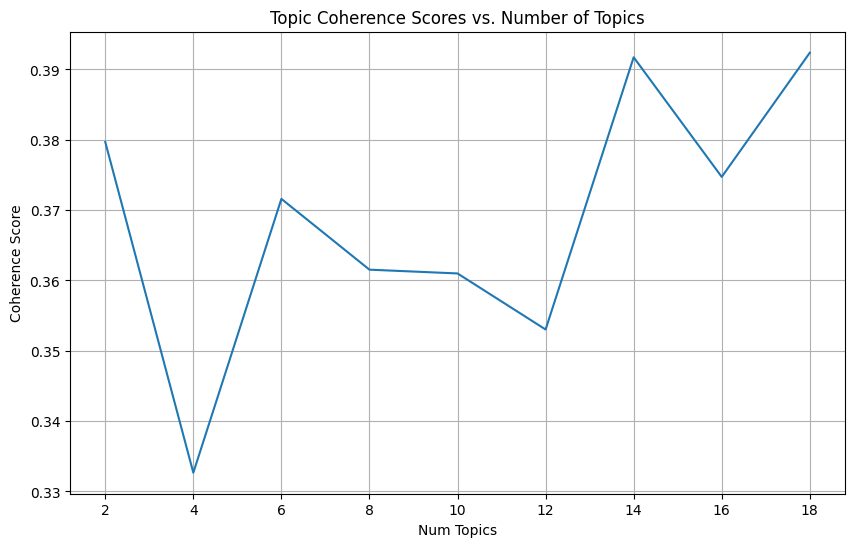

The optimal number of topics is: 18


In [ ]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# You'll need your pre-created dictionary and corpus
# Make sure you have the 'lemmatized_tokens' column in your DataFrame
# and the dictionary and corpus objects are correctly defined from them.
# The code below assumes these variables are ready to use.

# Function to compute coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts (your lemmatized tokens)
    limit : Max num of topics to check

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=100,
                         passes=10,
                         per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Run the function to find the optimal number of topics
# This might take a few minutes depending on your dataset size
limit = 20  # You can increase this to check more topics
start = 2   # Start from 2 topics
step = 2    # Check every 2nd number

model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=df['lemmatized_tokens'],
    start=start,
    limit=limit,
    step=step
)

# Plot the coherence values to find the optimal number of topics
x = range(start, limit, step)
plt.figure(figsize=(10, 6))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.title("Topic Coherence Scores vs. Number of Topics")
plt.xticks(x)
plt.grid(True)
plt.show()

# Find the number of topics with the highest coherence score
optimal_num_topics = x[coherence_values.index(max(coherence_values))]
print(f"The optimal number of topics is: {optimal_num_topics}")

Step 1: Train the Final LDA Model

In [ ]:
from gensim.models import LdaModel

# The optimal number of topics you found from the plot
optimal_num_topics = 18

# Train the final LDA model with the optimal number
final_lda_model = LdaModel(corpus=corpus,
                           id2word=dictionary,
                           num_topics=optimal_num_topics,
                           random_state=100,
                           passes=20, # Increased for a more refined model
                           per_word_topics=True)

# Print the top words for the final topics to re-interpret them
for idx, topic in final_lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

Topic: 0 
Words: 0.109*"wall" + 0.092*"street" + 0.090*"sp" + 0.064*"earning" + 0.042*"outlook" + 0.032*"target" + 0.029*"end" + 0.022*"strategist" + 0.022*"goldman" + 0.020*"st"

Topic: 1 
Words: 0.130*"sp" + 0.054*"continue" + 0.050*"apple" + 0.048*"join" + 0.038*"set" + 0.034*"value" + 0.033*"warn" + 0.030*"share" + 0.029*"come" + 0.029*"snap"

Topic: 2 
Words: 0.068*"not" + 0.043*"signal" + 0.043*"equity" + 0.042*"eye" + 0.040*"back" + 0.037*"correction" + 0.036*"dip" + 0.035*"do" + 0.033*"–" + 0.032*"even"

Topic: 3 
Words: 0.156*"dow" + 0.144*"sp" + 0.140*"nasdaq" + 0.073*"jones" + 0.044*"point" + 0.031*"streak" + 0.025*"index" + 0.024*"win" + 0.022*"future" + 0.021*"outperform"

Topic: 4 
Words: 0.091*"rate" + 0.090*"inflation" + 0.062*"datum" + 0.052*"sp" + 0.046*"well" + 0.040*"cut" + 0.038*"job" + 0.036*"stock" + 0.034*"us" + 0.032*"vs"

Topic: 5 
Words: 0.121*"sp" + 0.065*"stock" + 0.050*"since" + 0.047*"time" + 0.047*"first" + 0.046*"buy" + 0.044*"good" + 0.042*"bad" + 0.03

1. Market Performance
This category captures topics about general market movement, rallies, gains, and daily performance.

Words: dow, sp, nasdaq, jones, point, streak, win, outperform, high, record, close, hit, new, strong, rally, loss, bull, bear, rise, day, today, top, soar, etfs, may


2. Economic Policy & Outlook
This category is for topics related to macroeconomic factors and official policy decisions that affect the market.

Words: rate, inflation, datum, cut, job, us, year, recession, earning, could, next, fed, treasury, yield, sector, company


3. Corporate & Tech News
This group combines topics about specific company performance and the tech sector, which are often major news drivers.

Words: wall, street, earning, outlook, target, strategist, goldman, st, apple, continue, join, set, value, warn, share, snap, gain, tech, trade, lead


4. Market Volatility & Warnings
This category is crucial for your project and focuses on negative or cautious sentiment.

Words: not, signal, equity, eye, correction, dip, surge, drop, invest, fear, crash, fall, market, december, slip


5. Investor & Strategy
This category is about the investor's perspective, including sentiment, investment advice, and specific products.



Words: stock, buy, first, good, bad, price, month, index, etf, fund, dividend, hold, spy, investment, hedge, investor, return, profit, worry, billion, debt, support, focus, financial



6. General Financial News
This is a catch-all for topics that are too broad to fit into the other categories, but are still relevant to financial news.

Words: bank, look, go, expect, fresh, america, like, retail, update, live, ceo, ai, post, run, tesla, weekly, get, warren, buffett, rebound, spx, past, concern




Assign Dominant Topics to Headlines

In [ ]:
# Assuming 'final_lda_model' and 'corpus' are already defined from your previous steps

# Get the topic distribution for each document
topic_distributions = [final_lda_model.get_document_topics(doc) for doc in corpus]

# Find the dominant topic (with the highest probability) for each document
dominant_topics = []

for doc_topics in topic_distributions:
    # Find the topic with the highest probability
    dominant_topic = max(doc_topics, key=lambda item: item[1])
    dominant_topics.append(dominant_topic[0]) # The result is a tuple (topic_id, probability), we only need the ID

# Add the dominant topic IDs as a new column to your DataFrame
df['dominant_topic'] = dominant_topics

print("DataFrame with Dominant Topics:")
print(df[['Title', 'dominant_topic']].head())

DataFrame with Dominant Topics:
                                               Title  dominant_topic
0   JPMorgan Predicts 2008 Will Be "Nothing But Net"               6
1  Dow Tallies Biggest First-session-of-year Poin...               3
2                   2008 predictions for the S&P 500              15
3  U.S. Stocks Higher After Economic Data, Monsan...              12
4  U.S. Stocks Climb As Hopes Increase For More F...              16


Map Topics to High-Level Categories

In [ ]:
# Create a dictionary to map the original topic IDs to your new labels
topic_mapping = {
    # Market Performance
    3: 'Market Performance', 10: 'Market Performance', 16: 'Market Performance', 13: 'Market Performance',

    # Economic Policy & Outlook
    4: 'Economic Policy & Outlook', 11: 'Economic Policy & Outlook', 17: 'Economic Policy & Outlook',

    # Corporate & Tech News
    0: 'Corporate & Tech News', 1: 'Corporate & Tech News', 12: 'Corporate & Tech News',

    # Market Volatility & Warnings
    2: 'Market Volatility & Warnings', 6: 'Market Volatility & Warnings',

    # Investor & Strategy
    5: 'Investor & Strategy', 9: 'Investor & Strategy', 15: 'Investor & Strategy',

    # General Financial News
    7: 'General Financial News', 8: 'General Financial News', 14: 'General Financial News',
}

# Use the mapping to create a new column with your high-level categories
df['high_level_category'] = df['dominant_topic'].map(topic_mapping)

print("\nDataFrame with High-Level Categories:")
print(df[['dominant_topic', 'high_level_category']].head())


DataFrame with High-Level Categories:
   dominant_topic           high_level_category
0               6  Market Volatility & Warnings
1               3            Market Performance
2              15           Investor & Strategy
3              12         Corporate & Tech News
4              16            Market Performance


Step 3: Analyze Trends and Visualize Correlation

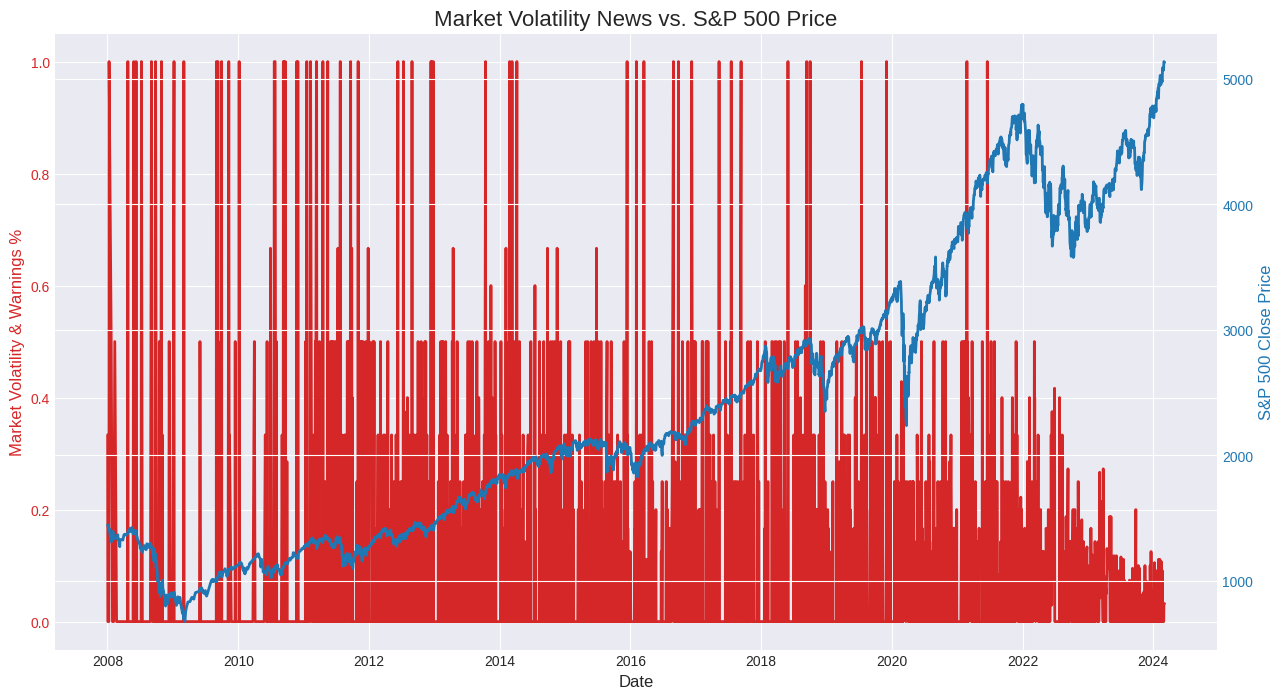


Final Merged Data (Top 5 Rows):
        Date  Corporate & Tech News  Economic Policy & Outlook  \
0 2008-01-02                    0.0                        0.0   
1 2008-01-02                    0.0                        0.0   
2 2008-01-02                    0.0                        0.0   
3 2008-01-03                    1.0                        0.0   
4 2008-01-07                    0.0                        0.0   

   General Financial News  Investor & Strategy  Market Performance  \
0                     0.0             0.333333            0.333333   
1                     0.0             0.333333            0.333333   
2                     0.0             0.333333            0.333333   
3                     0.0             0.000000            0.000000   
4                     0.0             0.000000            1.000000   

   Market Volatility & Warnings  \
0                      0.333333   
1                      0.333333   
2                      0.333333   
3        

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure your 'Date' column is a datetime object for time-series analysis
df['Date'] = pd.to_datetime(df['Date'])

# Load your S&P 500 data if you haven't already
# Replace with the correct file path and column names
stock_df = pd.read_csv('/content/sp500_headlines_2008_2024.csv')
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

# Count the number of headlines for each category per day
category_counts_per_day = df.groupby([df['Date'].dt.date, 'high_level_category']).size().unstack(fill_value=0)

# Calculate the proportion of each category per day
category_proportions_per_day = category_counts_per_day.div(category_counts_per_day.sum(axis=1), axis=0)

# Convert the index of your trend DataFrame to datetime for the merge
category_proportions_per_day.index = pd.to_datetime(category_proportions_per_day.index)

# Merge the topic trends with the stock data on the date
merged_df = category_proportions_per_day.merge(stock_df, on='Date', how='inner')

# Plot a topic of interest vs. the S&P 500 price
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(15, 8))

# First, plot the Market Volatility & Warnings category as it's a key topic for your project
ax1 = plt.gca()
color = 'tab:red'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Market Volatility & Warnings %', color=color, fontsize=12)
ax1.plot(merged_df['Date'], merged_df['Market Volatility & Warnings'], color=color, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the S&P 500 price
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('S&P 500 Close Price', color=color, fontsize=12)
ax2.plot(merged_df['Date'], merged_df['CP'], color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Market Volatility News vs. S&P 500 Price', fontsize=16)
plt.show()

print("\nFinal Merged Data (Top 5 Rows):")
print(merged_df.head())

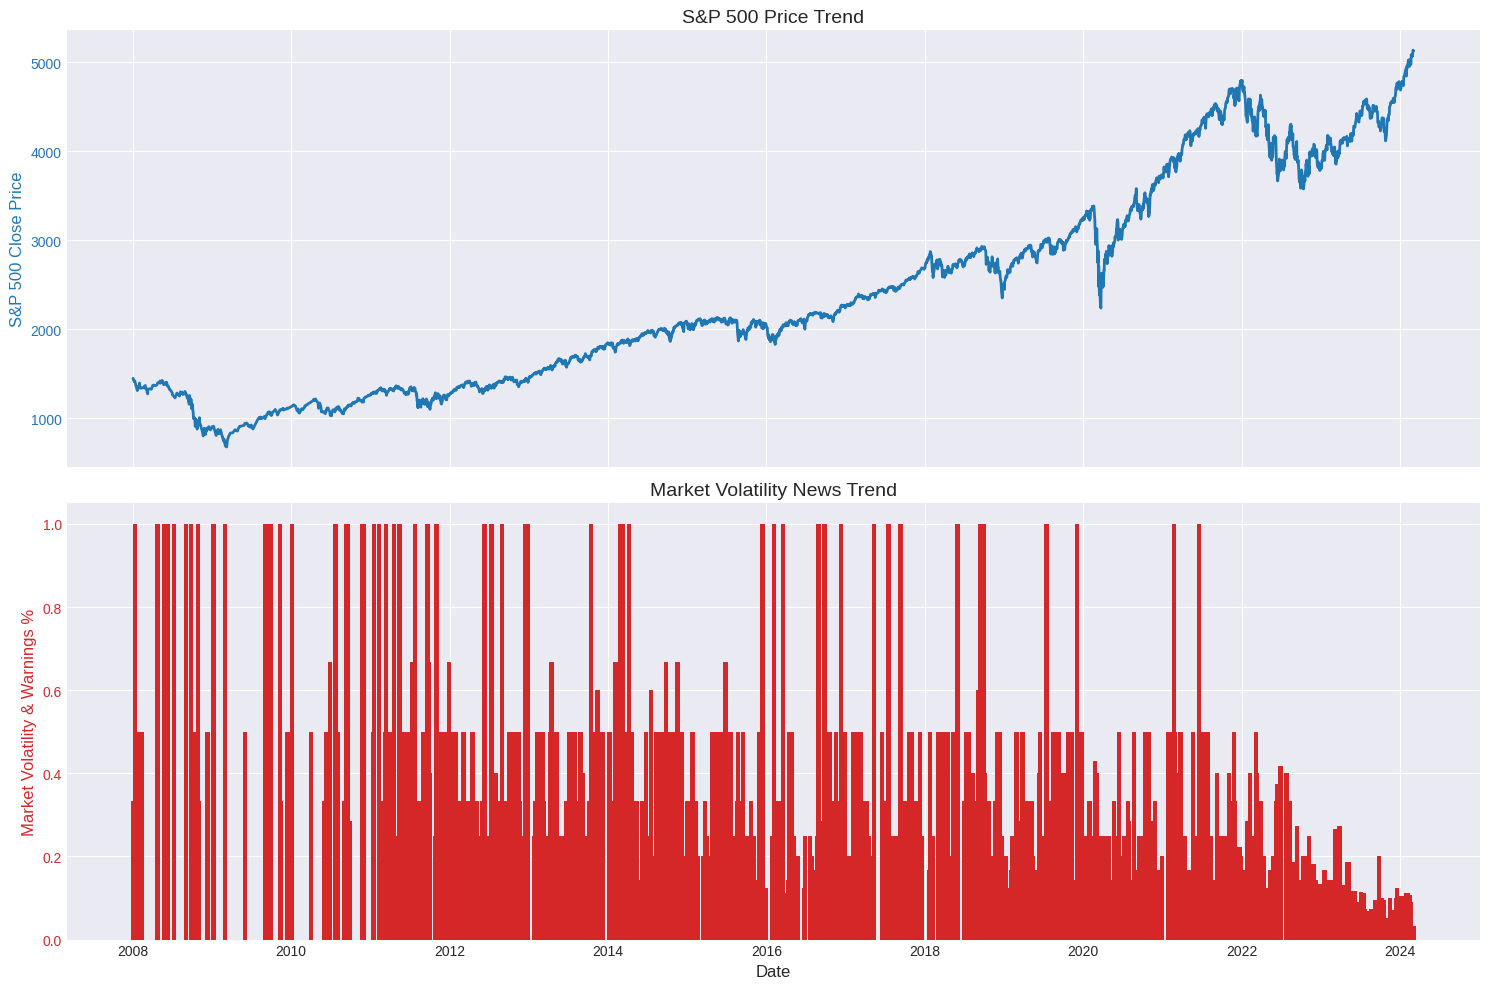

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True)

# Plot the S&P 500 Close Price in the top subplot
ax1.plot(merged_df['Date'], merged_df['CP'], color='tab:blue', linewidth=2)
ax1.set_ylabel('S&P 500 Close Price', color='tab:blue', fontsize=12)
ax1.set_title('S&P 500 Price Trend', fontsize=14)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot the Market Volatility & Warnings % in the bottom subplot
ax2.bar(merged_df['Date'], merged_df['Market Volatility & Warnings'], color='tab:red', width=20)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Market Volatility & Warnings %', color='tab:red', fontsize=12)
ax2.set_title('Market Volatility News Trend', fontsize=14)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()
plt.show()